In [1]:
pip install textblob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.3/624.3 kB 8.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 31.5 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstalled nltk-3.8.1
Note: you may need to restart the kernel to use updated packages.


In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

In [9]:
# Load cleaned dataset
df = pd.read_csv("data_cleaned.csv")

# Display basic dataset info
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()

Dataset Shape: (44657, 5)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44657 entries, 0 to 44656
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44657 non-null  object
 1   text     44657 non-null  object
 2   subject  44657 non-null  object
 3   date     44657 non-null  object
 4   real     44657 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB



Summary Statistics:
               real
count  44657.000000
mean       0.474976
std        0.499379
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000


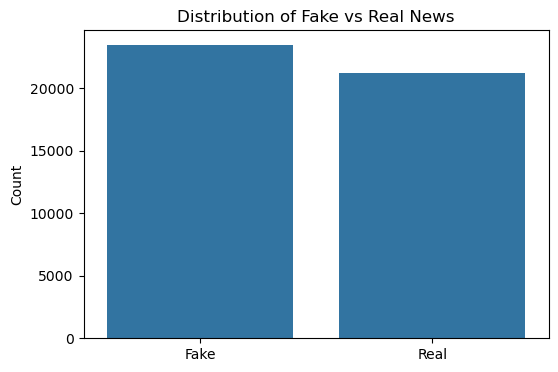

In [10]:
# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())

# Distribution of labels
plt.figure(figsize=(6, 4))
sns.countplot(x=df['real'])
plt.title("Distribution of Fake vs Real News")
plt.xticks(ticks=[0, 1], labels=["Fake", "Real"])
plt.xlabel("")
plt.ylabel("Count")
plt.show()

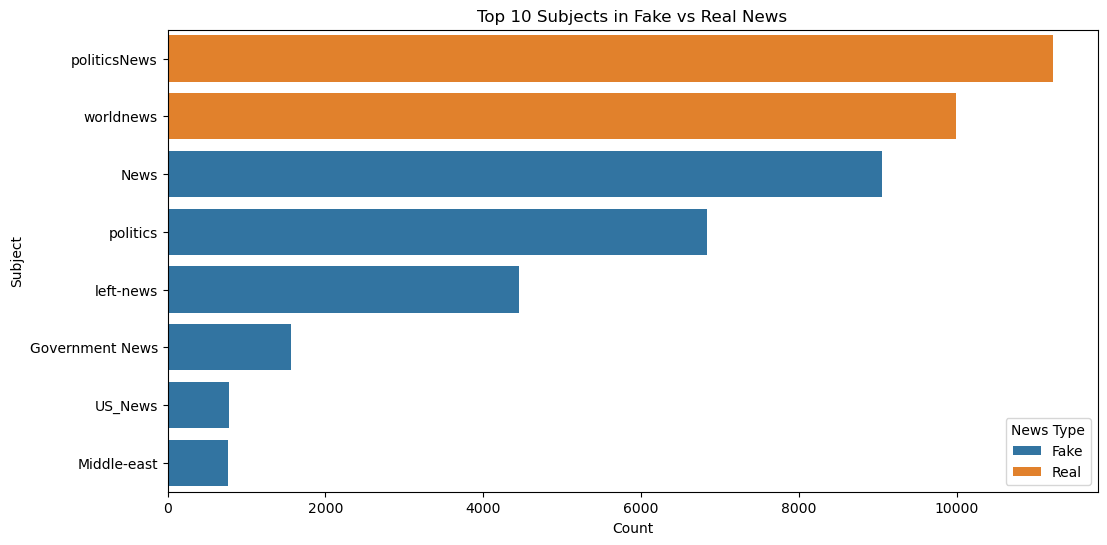

In [12]:
# Most common subjects in fake vs real news
plt.figure(figsize=(12, 6))
sns.countplot(y=df['subject'], order=df['subject'].value_counts().index[:10], hue=df['real'])
plt.title("Top 10 Subjects in Fake vs Real News")
plt.xlabel("Count")
plt.ylabel("Subject")
plt.legend(title="News Type", labels=["Fake", "Real"])
plt.show()

In [18]:
# Sentiment Analysis on Statements
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['sentiment'] = df['text'].apply(get_sentiment)

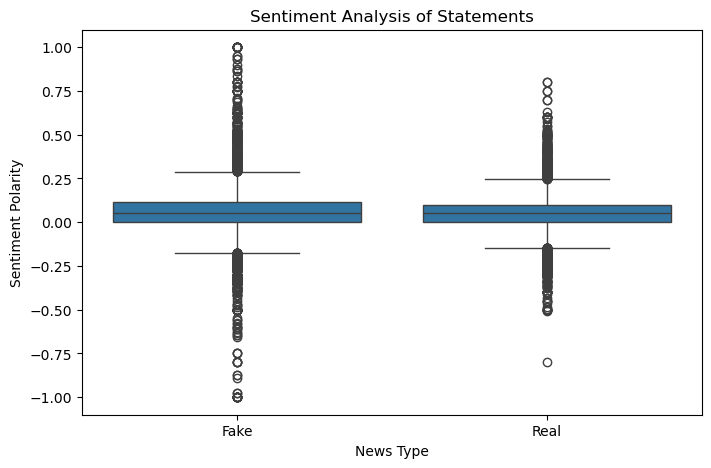

In [19]:
# Sentiment distribution by news type
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['real'], y=df['sentiment'])
plt.title("Sentiment Analysis of Statements")
plt.xticks(ticks=[0, 1], labels=["Fake", "Real"])
plt.xlabel("News Type")
plt.ylabel("Sentiment Polarity")
plt.show()

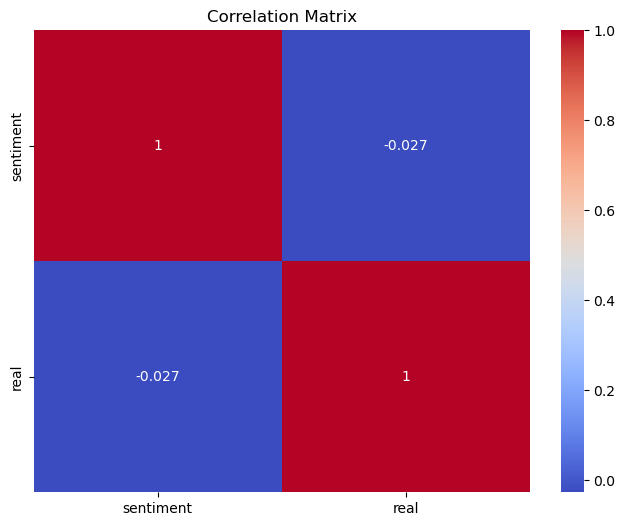

In [26]:
# Correlation analysis between numerical columns
plt.figure(figsize=(8, 6))
sns.heatmap(df[["sentiment", "real"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()